In [1]:
project_path = '../../'
import sys
sys.path.insert(1, project_path)   # caution: path[0] is reserved for script path (or '' in REPL)
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import copy
import data_loader
from tqdm import tqdm
from sklearn import linear_model

In [2]:
 X, y, ID = data_loader.load_dataset(X_path='../../data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='../../data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='../../data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv') 
emotion_label = 'happy'

# Relabeling and normilizing
y_true = np.zeros((len(y)))
y_true[np.squeeze(y.values==emotion_label)] = 1
y_true[y_true==0] = -1

X_data = X.values
X_norm = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)
y_reg = copy.copy(y_true)                                    

 # LASSO ranking
Lasso_model = linear_model.Lasso()
Npt = 200
coeffs = np.zeros((X_norm.shape[1],Npt))
lambda_ = np.logspace(-12.5, 0.3, Npt)
i = 0
for lamb in tqdm(lambda_):
    Lasso_model = linear_model.Lasso(alpha=lamb, max_iter=20000)
    Lasso_model.fit(X_norm,y_reg)
    coeffs[:,i] = Lasso_model.coef_
    i = i + 1

data loaded in 0.6301932334899902ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302 

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:07<24:01,  7.24s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:15<24:55,  7.55s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordina

In [3]:
# np.save(f'lasso_coeff.npy', coeffs)    # .npy extension is added if not given
# np.save(f'lasso_lambda_.npy', lambda_)

coeffs = np.load(f'lasso_coeff.npy')
lambda_= np.load(f'lasso_lambda_.npy')

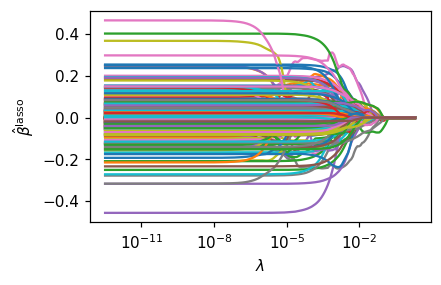

In [8]:
# fig = plt.figure(figsize=(6,2),dpi=110)   № paper
fig = plt.figure(figsize=(4,2.5),dpi=110)     # presentation
plt.semilogx(lambda_, coeffs.T)
plt.xlabel('$\lambda$')
plt.ylabel('$\hat{\\beta}^{\mathrm{lasso}}$')
plt.show()

image_name = f'../../Doc/dspa_2024/Figure/LASSO_vis_v2.jpg'
fig.savefig(image_name, format='jpg', dpi=280, bbox_inches='tight', pad_inches = 0.1)

In [5]:
print(0.5*[6, 5])

TypeError: can't multiply sequence by non-int of type 'float'